In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Thu_Nov_18_09:45:30_PST_2021
Cuda compilation tools, release 11.5, V11.5.119
Build cuda_11.5.r11.5/compiler.30672275_0
gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [1]:
import torch
torch.__version__
import mmseg
print (mmseg.__version__)

0.30.0


In [2]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [68]:
config_file = 'mmsegmentation/configs/pspnet/pspnet_r101-d8_512x512_160k_ade20k.py'
checkpoint_file = 'semg_net_ckpt/pspnet_r101-d8_512x512_160k_ade20k_20200615_100650-967c316f.pth'

In [69]:
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/home/hanzheng/DROID-SLAM/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: semg_net_ckpt/pspnet_r101-d8_512x512_160k_ade20k_20200615_100650-967c316f.pth


In [65]:
import numpy as np
data_path = 'reconstructions/office_reconstruction/images.npy'
data = np.load(data_path)
print(data.shape)

(329, 3, 328, 584)


In [70]:
img = data[0]
img = np.transpose(img, (1, 2, 0))
result = inference_segmentor(model, img)

/home/hanzheng/DROID-SLAM/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


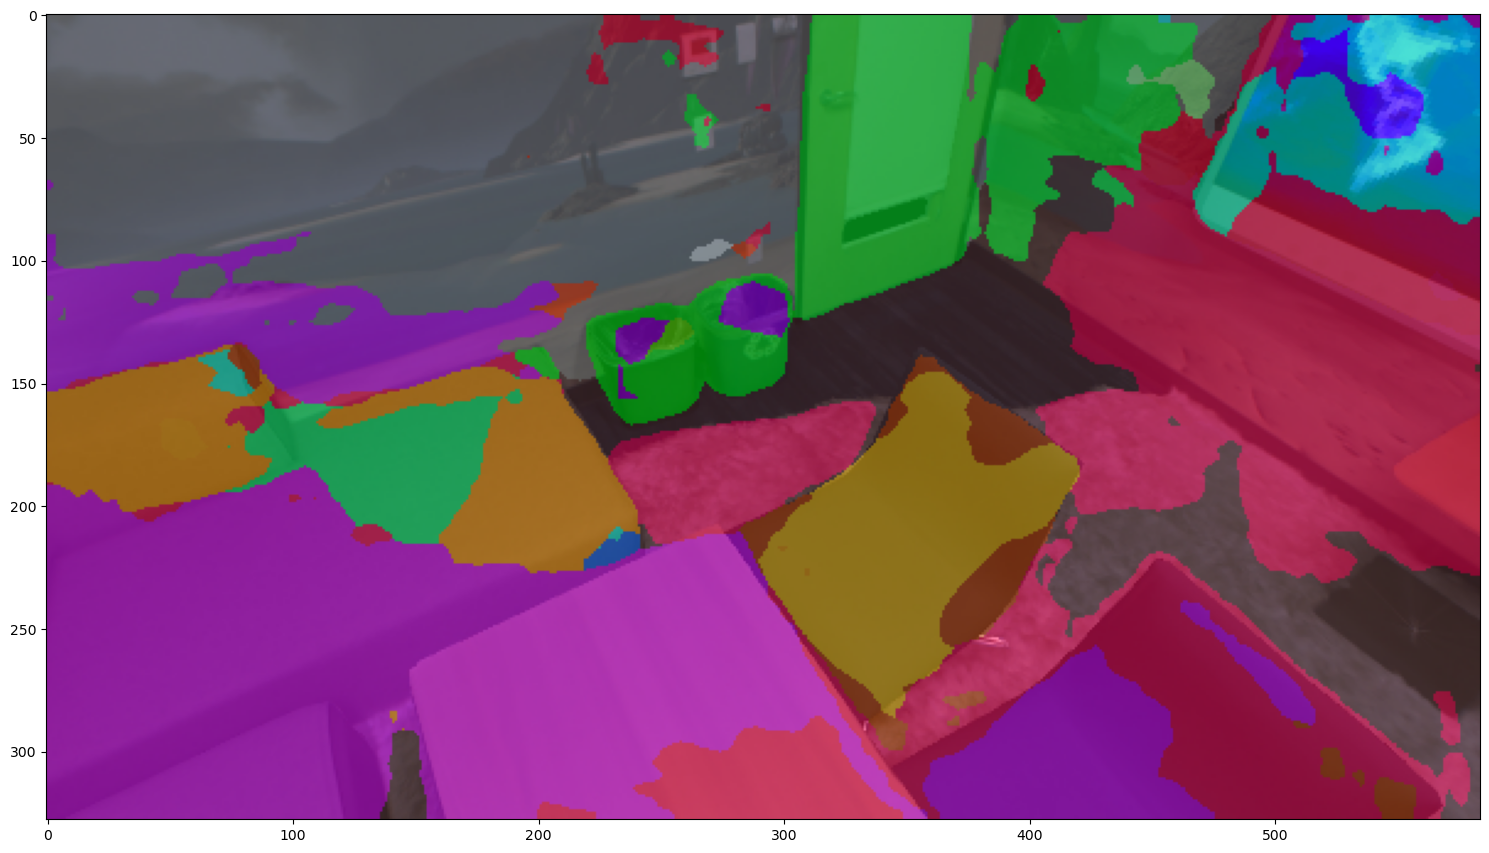

(328, 584)


In [71]:
show_result_pyplot(model, img, result)
print(result[0].shape)

In [20]:
import numpy as np

In [23]:
data_path = 'reconstructions/office_reconstruction/images.npy'
data = np.load(data_path)
print(data.shape)

(329, 3, 328, 584)


In [72]:
segmented_imag_all = []

for img in data:
    img = np.transpose(img, (1, 2, 0))
    segmented_imag = inference_segmentor(model, img)
    segmented_imag_all.append(segmented_imag[0])       

segmented_imag_all = np.array(segmented_imag_all)

In [73]:
print(segmented_imag_all.shape)

(329, 328, 584)


In [74]:
np.save('office_segmented_all.npy',segmented_imag_all)